In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('../Dataset/body_level_classification_train.csv')
data.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Female,22.547298,1.722461,51.881263,yes,2.663421,1.041110,no,no,3.000000,Frequently,yes,no,0.794402,1.391948,Public_Transportation,Body Level 1
1,Male,19.799054,1.743702,54.927529,yes,2.000000,2.847264,Sometimes,no,3.289260,Sometimes,yes,no,1.680844,2.000000,Public_Transportation,Body Level 1
2,Female,17.823438,1.708406,50.000000,yes,1.642241,1.099231,Sometimes,no,3.452590,Sometimes,no,no,0.418875,1.000000,Public_Transportation,Body Level 1
3,Female,19.007177,1.690727,49.895716,yes,1.212908,1.029703,Sometimes,no,3.207071,Sometimes,no,no,2.000000,1.000000,Public_Transportation,Body Level 1
4,Male,19.729250,1.793315,58.195150,yes,2.508835,2.076933,no,no,3.435905,Sometimes,yes,no,2.026668,1.443328,Automobile,Body Level 1


In [4]:
# checking for null values and data types
data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              1477 non-null   object 
 1   Age                 1477 non-null   float64
 2   Height              1477 non-null   float64
 3   Weight              1477 non-null   float64
 4   H_Cal_Consump       1477 non-null   object 
 5   Veg_Consump         1477 non-null   float64
 6   Water_Consump       1477 non-null   float64
 7   Alcohol_Consump     1477 non-null   object 
 8   Smoking             1477 non-null   object 
 9   Meal_Count          1477 non-null   float64
 10  Food_Between_Meals  1477 non-null   object 
 11  Fam_Hist            1477 non-null   object 
 12  H_Cal_Burn          1477 non-null   object 
 13  Phys_Act            1477 non-null   float64
 14  Time_E_Dev          1477 non-null   float64
 15  Transport           1477 non-null   object 
 16  Body_L

,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,24.290420,1.701602,86.542290,2.421912,2.005120,2.682104,1.023106,0.650672
std,6.323081,0.094654,26.278277,0.540711,0.620307,0.790751,0.844840,0.605199
min,15.000000,1.456346,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.895877,1.629194,65.000000,2.000000,1.549931,2.644692,0.145687,0.000000
50%,22.720449,1.701284,82.636162,2.416044,2.000000,3.000000,1.000000,0.616045
75%,26.000000,1.770278,106.690530,3.000000,2.482933,3.000000,1.672639,1.000000
max,55.246250,1.980000,173.000000,3.000000,3.000000,4.000000,3.000000,2.000000


In [5]:
# getting unique values in non-numeric columns
print(data.Gender.unique())
print(data.H_Cal_Consump.unique())
print(data.Alcohol_Consump.unique())
print(data.Smoking.unique())
print(data.Food_Between_Meals.unique())
print(data.Fam_Hist.unique())
print(data.H_Cal_Burn.unique())
print(data.Transport.unique())
print(data.Body_Level.unique())

label = 'Body_Level'
num_classes = len(data[label].unique())

['Female' 'Male']
['yes' 'no']
['no' 'Sometimes' 'Frequently' 'Always']
['no' 'yes']
['Frequently' 'Sometimes' 'no' 'Always']
['yes' 'no']
['no' 'yes']
['Public_Transportation' 'Automobile' 'Walking' 'Bike' 'Motorbike']
['Body Level 1' 'Body Level 2' 'Body Level 3' 'Body Level 4']


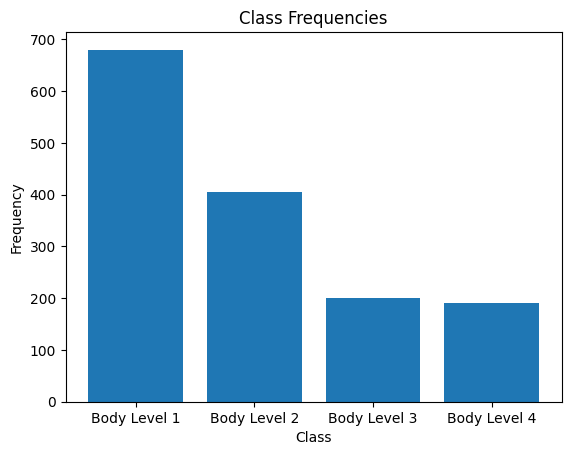

Body_Level
Body Level 4    680
Body Level 3    406
Body Level 2    201
Body Level 1    190
Name: count, dtype: int64


In [6]:
# insights on classes frequencies
plt.bar(data[label].unique(), data[label].value_counts())
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Frequencies')
plt.show()
#
print(data[label].value_counts())

In [10]:
# encoding categorical values
data_encoded = data.copy()
data_encoded['Gender'] = data_encoded['Gender'].map({'Female': 0, 'Male': 1})
data_encoded['H_Cal_Consump'] = data_encoded['H_Cal_Consump'].map({'no': 0, 'yes': 1})
data_encoded['Alcohol_Consump'] = data_encoded['Alcohol_Consump'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
data_encoded['Smoking'] = data_encoded['Smoking'].map({'no': 0, 'yes': 1})
data_encoded['Food_Between_Meals'] = data_encoded['Food_Between_Meals'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
data_encoded['Fam_Hist'] = data_encoded['Fam_Hist'].map({'no': 0, 'yes': 1})
data_encoded['H_Cal_Burn'] = data_encoded['H_Cal_Burn'].map({'no': 0, 'yes': 1})
data_encoded['Transport'] = data_encoded['Transport'].map({'Bike': 0, 'Walking': 1, 'Public_Transportation': 2, 'Motorbike': 3, 'Automobile': 4})
data_encoded['Body_Level'] = data_encoded['Body_Level'].map({'Body Level 1': 0, 'Body Level 2': 1, 'Body Level 3': 2, 'Body Level 4': 3})

data_encoded.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,0,22.547298,1.722461,51.881263,1,2.663421,1.041110,0,0,3.000000,2,1,0,0.794402,1.391948,2,0
1,1,19.799054,1.743702,54.927529,1,2.000000,2.847264,1,0,3.289260,1,1,0,1.680844,2.000000,2,0
2,0,17.823438,1.708406,50.000000,1,1.642241,1.099231,1,0,3.452590,1,0,0,0.418875,1.000000,2,0
3,0,19.007177,1.690727,49.895716,1,1.212908,1.029703,1,0,3.207071,1,0,0,2.000000,1.000000,2,0
4,1,19.729250,1.793315,58.195150,1,2.508835,2.076933,0,0,3.435905,1,1,0,2.026668,1.443328,4,0


In [11]:
# check for any null
data_encoded.isna().any()

Gender                False
Age                   False
Height                False
Weight                False
H_Cal_Consump         False
Veg_Consump           False
Water_Consump         False
Alcohol_Consump       False
Smoking               False
Meal_Count            False
Food_Between_Meals    False
Fam_Hist              False
H_Cal_Burn            False
Phys_Act              False
Time_E_Dev            False
Transport             False
Body_Level            False
dtype: bool

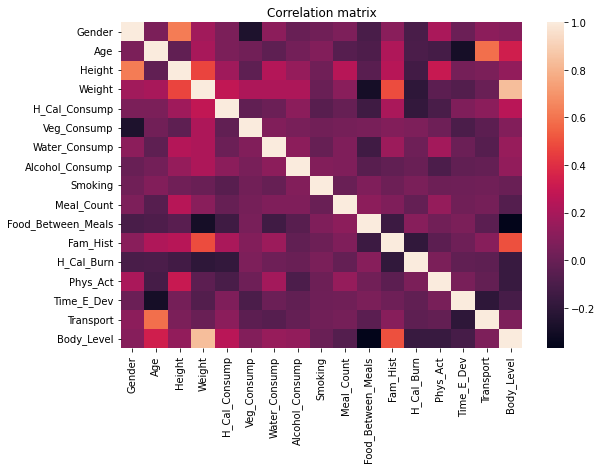

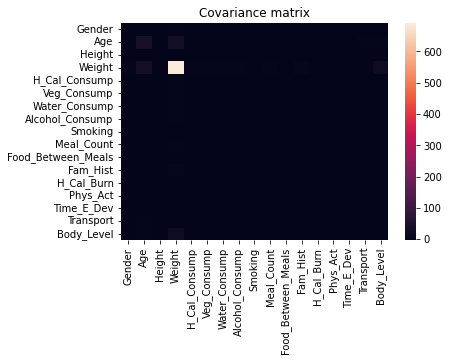

In [17]:
# analyze correlation between features
import seaborn as sns
plt.figure(figsize=(9, 6))
corr = data_encoded.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Correlation matrix')
plt.show()

# save plot to image
# analyze covariance between features
cov = data_encoded.cov()
sns.heatmap(cov,
            xticklabels=cov.columns.values,
            yticklabels=cov.columns.values)
plt.title('Covariance matrix')
plt.show()

In [20]:
# print(corr)
print(corr['Gender']['Age'])

0.06156381051847761


In [21]:
# print most correlated features
dic = {}
#
for col1 in data_encoded.columns:
    for col2 in data_encoded.columns:
        if col1 == col2: continue
        #
        dic[corr[col1][col2]] = (col1, col2)
#
# output highest 10 pairs

In [32]:
lst = [(k, v) for k, v in dic.items()]
lst.sort(reverse=True)
for k, v in lst[:10]:
    print(v, k)

('Body_Level', 'Weight') 0.8371957052410501
('Height', 'Gender') 0.6241651811936697
('Transport', 'Age') 0.5849296527796018
('Body_Level', 'Fam_Hist') 0.49867965756782573
('Fam_Hist', 'Weight') 0.48773334975982136
('Weight', 'Height') 0.46947452942254536
('Body_Level', 'Age') 0.33273441334329856
('Phys_Act', 'Height') 0.3022028847742787
('H_Cal_Consump', 'Weight') 0.27769264238629504
('Body_Level', 'H_Cal_Consump') 0.25238149384015734


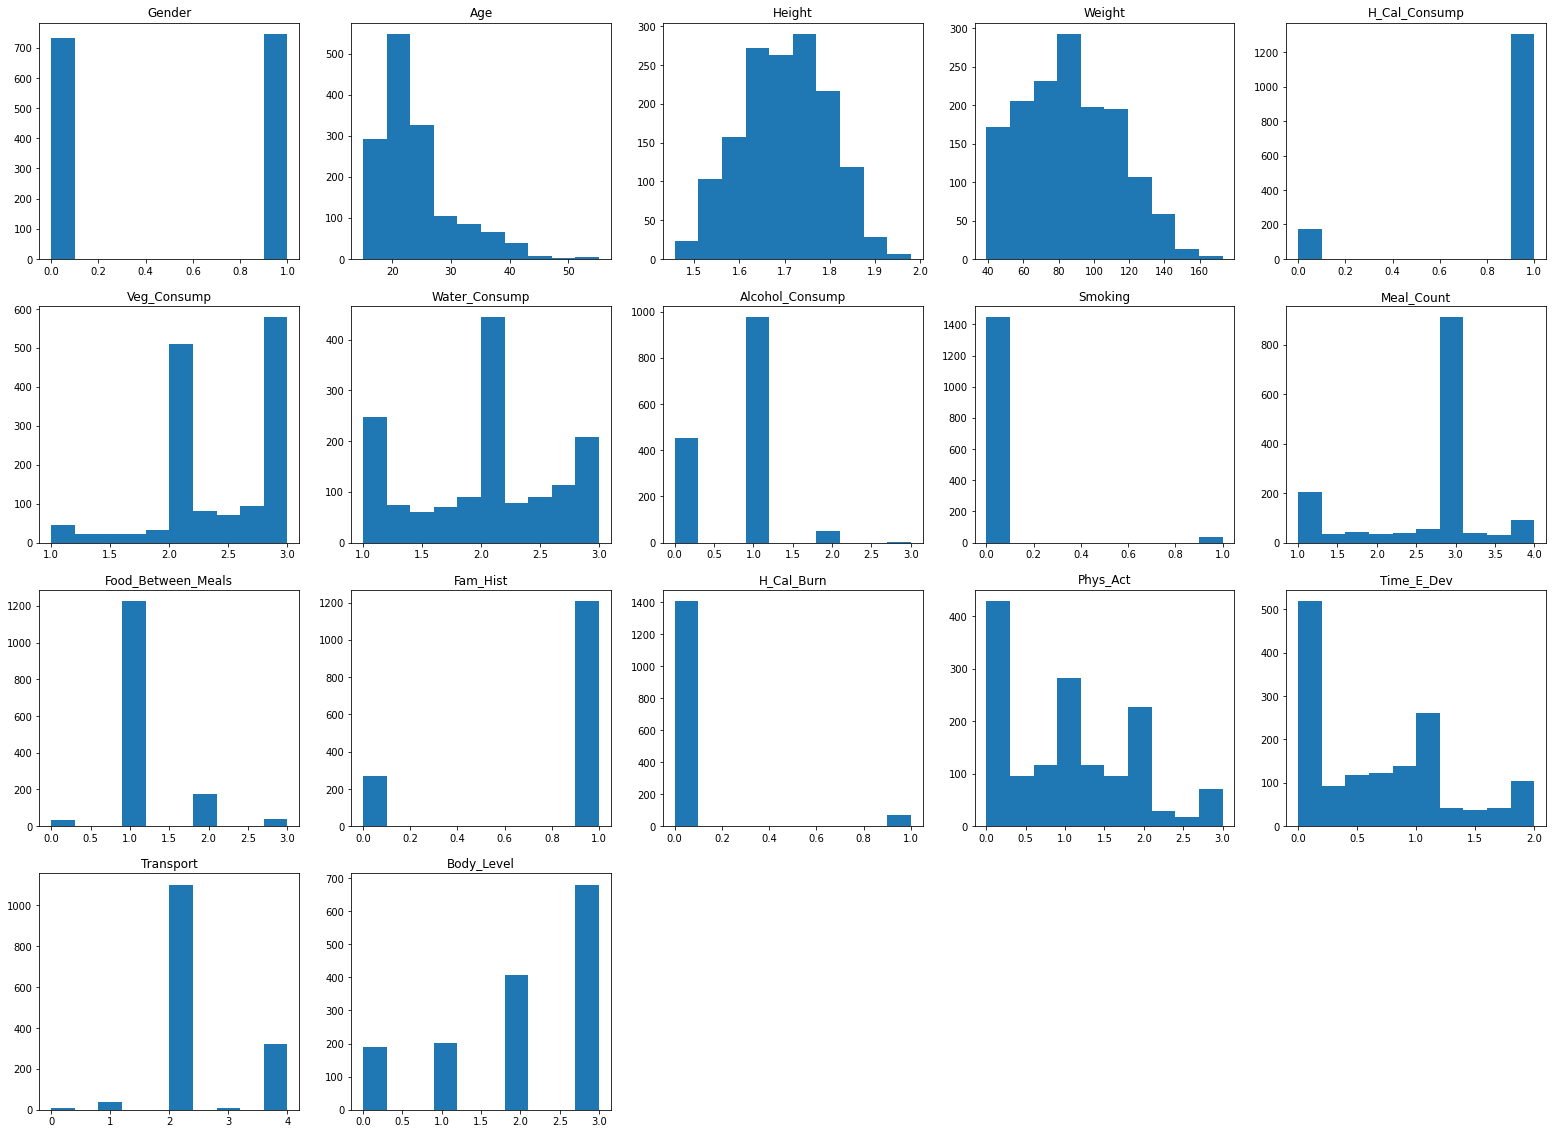

In [40]:
fig = plt.figure(figsize=(27,20))

# analyze feature distributions
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, col in enumerate(data_encoded.columns):
    ax = fig.add_subplot(4, 5, i+1)
    ax.hist(data_encoded[col])
    ax.set_title(col)

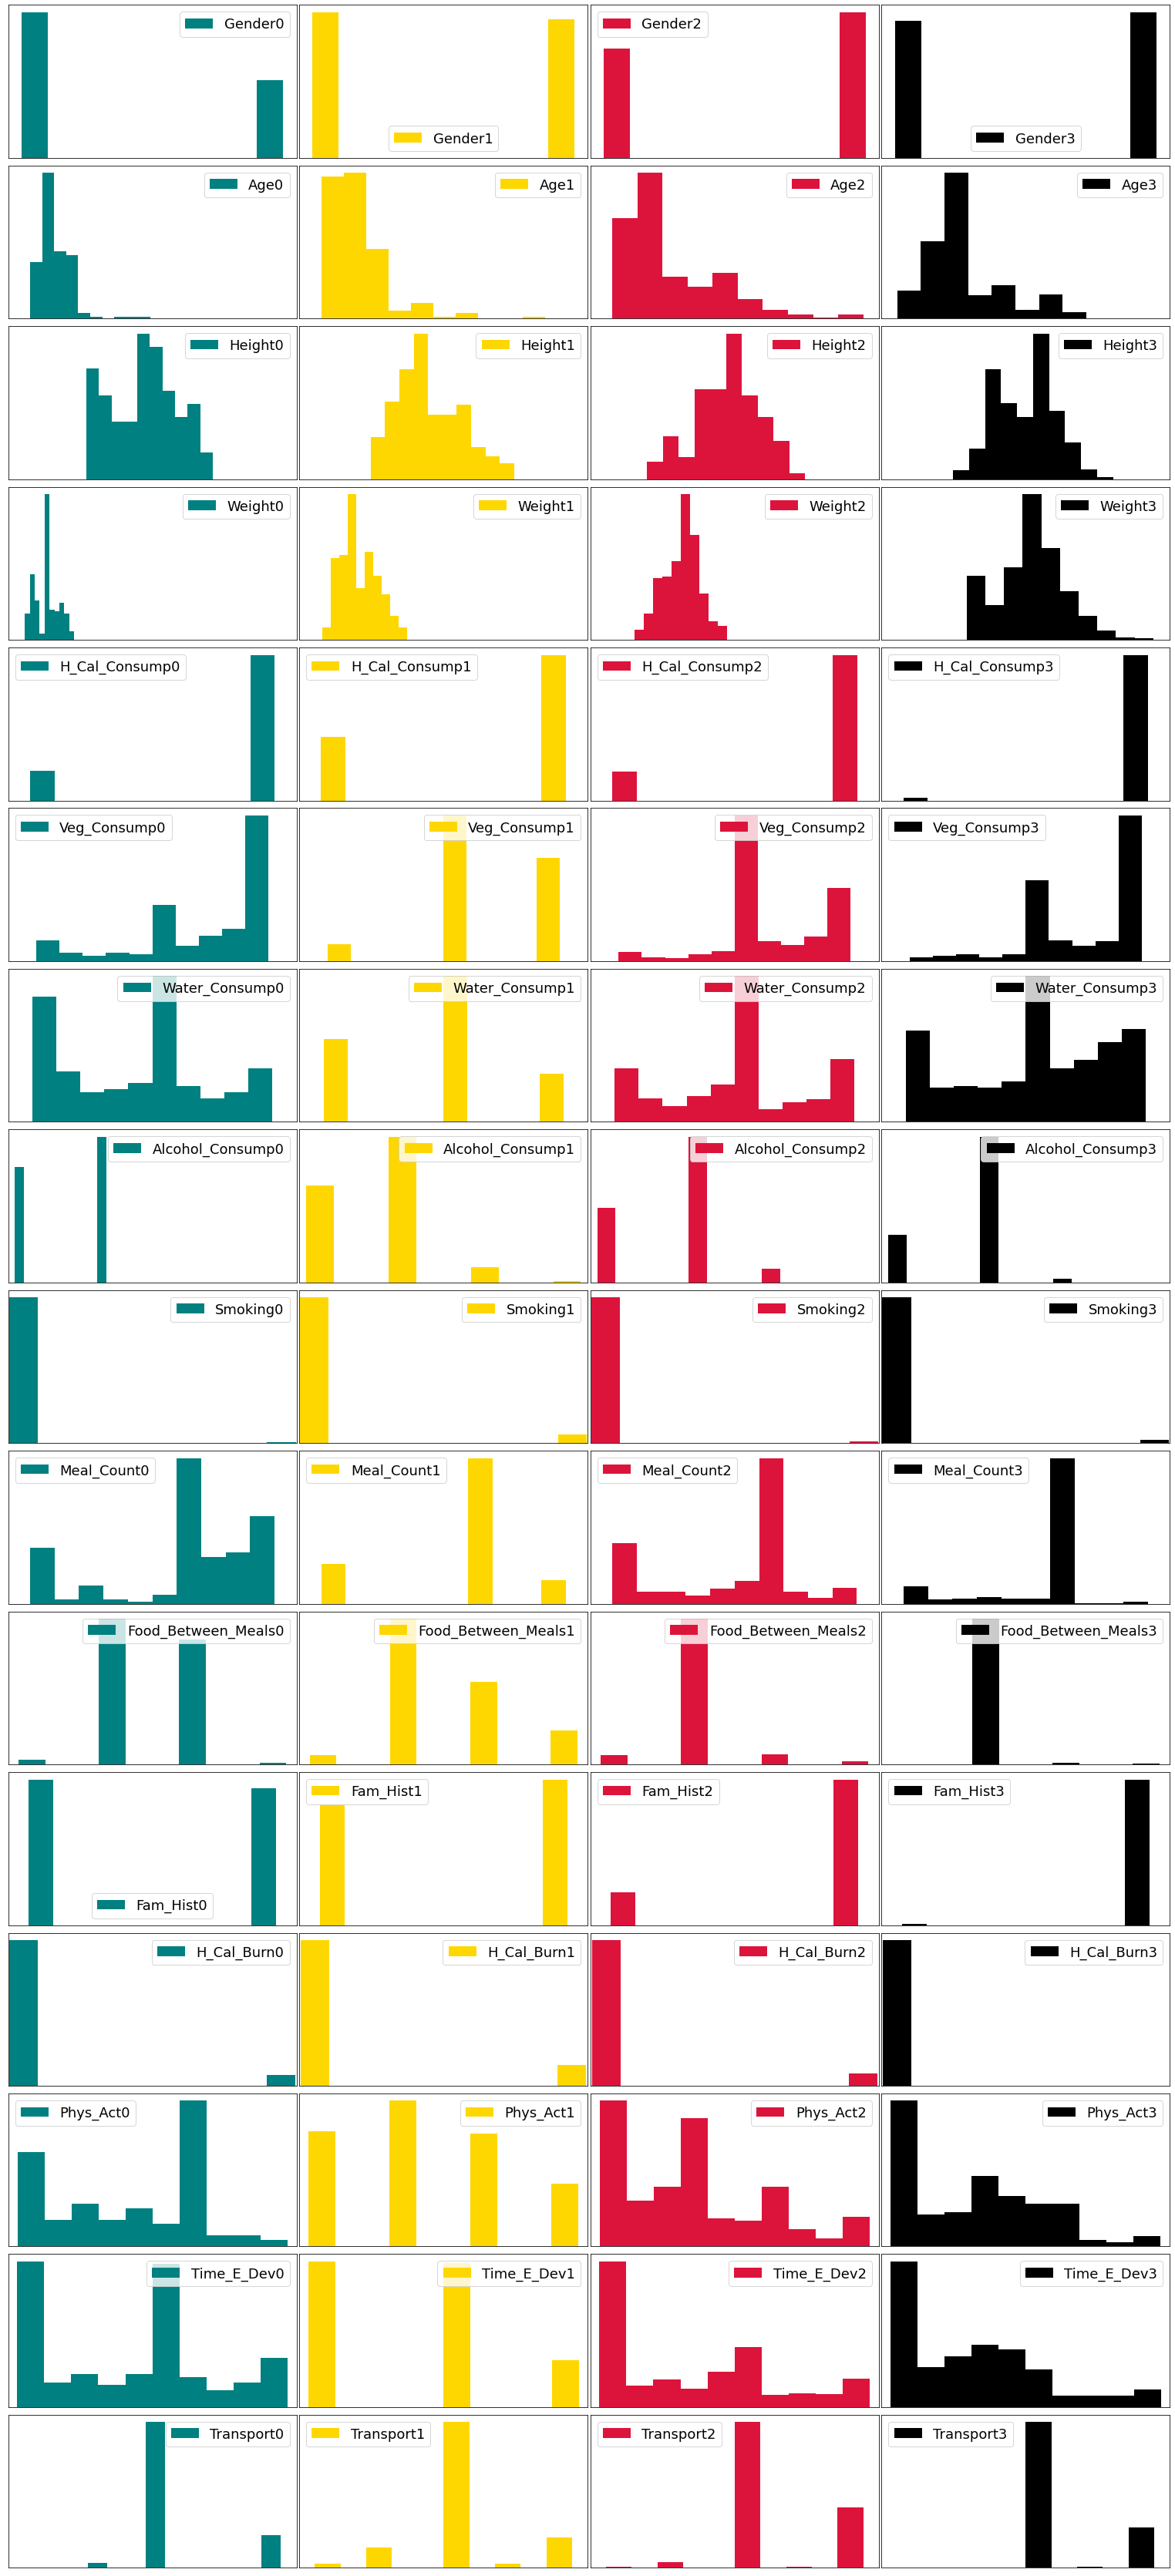

In [59]:
# analyze feature distributions among classes
# show each feature in all classes
fig = plt.figure(figsize=(27,65))
# decrease distance between plots
fig.subplots_adjust(hspace=0.05, wspace=0.01)

label='Body_Level'
V = len(data_encoded.columns)
C = len(data_encoded[label].unique())
clrs = ['teal', 'gold', 'crimson', 'black']
for i, col in enumerate(data_encoded.columns):
    if col == label:    continue
    lwr = data_encoded[col].min() - data_encoded[col].mean()*.1
    upr = data_encoded[col].max() + data_encoded[col].mean()*.1
    for j, lbl in enumerate(data_encoded[label].unique()):
        ax = fig.add_subplot(V, C, i*C+j+1)
        ax.hist(data_encoded[col][data_encoded[label] == lbl], label=col+' in C'+str(lbl), color=clrs[j])
        # fixed x_bounds for proper visualisation
        ax.set_xbound(lower=lwr, upper=upr)
        # show and increase label size
        ax.legend(fontsize=18)
        # hide x and y ticks, we already fixed x_bounds
        ax.set_xticks([])
        ax.set_yticks([])
#